<a href="https://colab.research.google.com/github/FraGoTe/redes-neuronales/blob/master/AlexNetClasificacionEnfermedadesPulmonares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AlexNet Clasificación Enfermedades Pulmores




##Carga de datos
---

In [0]:
%%bash

if [ ! -d "Data_resize" ]; then
    wget --load-cookies /tmp/cookies.txt \
    "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt \
    --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=19QPg77DJmTnL5XWkZm3QfoDaeWmXZcj0' -O- | \
    sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=19QPg77DJmTnL5XWkZm3QfoDaeWmXZcj0" -O data.zip && rm -rf /tmp/cookies.txt

    unzip data.zip
fi

Mostrando lista de archivos:

In [4]:
%%bash
ls -l

total 1206572
drwxr-xr-x 4 root root       4096 Jan  5  2018 chest_xray
-rw-r--r-- 1 root root 1235512464 Jan  6  2018 ChestXRay2017.zip
drwxrwxr-x 3 root root       4096 Jan  6  2018 __MACOSX
drwxr-xr-x 1 root root       4096 Nov 21 16:30 sample_data


## VISUALIZACION DE DATA
---

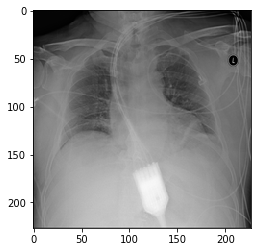

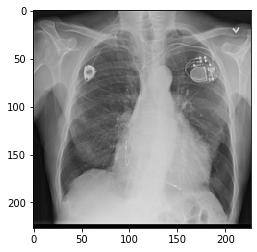

In [72]:
# Cargando dataset, redimensionando y guardando archivos
from keras.preprocessing.image import load_img

# Folders
# path_torax
path_at = 'Data_resize/Data_Enfermedades/test/Atelectasis/00000109_000.png'
# path_abdomen
path_car = 'Data_resize/Data_Enfermedades/test/Cardiomegaly/00000044_002.png'

# Mostrar las imágenes de nuestro dataset
import matplotlib.pyplot as plt
img_rx_at = load_img(path_at)
img_rx_car = load_img(path_car)

plt.imshow(img_rx_at)
plt.show()
plt.imshow(img_rx_car)
plt.show()


 ## PARTE I - PREPROCESAMIENTO DE DATOS
---


In [63]:
from keras.preprocessing.image import ImageDataGenerator

# Folder
folder_main = 'Data_resize/Data_Enfermedades'

# Preprocesamiento de imágenes: Definiremos una dimensión de 300x300
img_width = 227
img_height = 227

print("\nDescripción de la data de training:")
# Generador de data
datagen = ImageDataGenerator( rescale = 1.0/255.0, horizontal_flip = True)
# rescale: Normalizar valores [0-1] en lugar de [0-255]
# horizontal_flip: valor booleno. Voltea aleatoriamente las entradas horizontalmente.

training_set = datagen.flow_from_directory(folder_main + '/train',
                                                 target_size = (img_width, img_height),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

print("\nDescripción de la data de testing:")
testing_set = datagen.flow_from_directory(folder_main + '/test',
                                                 target_size = (img_width, img_height),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

num_imgs_training = len(training_set.filenames)
num_imgs_testing = len(testing_set.filenames)

print("\n")
print(training_set.class_indices)
print("Número de imágenes de entenamiento: ",num_imgs_training)
print("Número de imágenes de testing: ",num_imgs_testing)


Descripción de la data de training:
Found 24771 images belonging to 14 classes.

Descripción de la data de testing:
Found 6192 images belonging to 14 classes.


{'Atelectasis': 0, 'Cardiomegaly': 1, 'Consolidation': 2, 'Edema': 3, 'Effusion': 4, 'Emphysema': 5, 'Fibrosis': 6, 'Hernia': 7, 'Infiltration': 8, 'Mass': 9, 'Nodule': 10, 'Pleural_Pneumonia': 11, 'Pleural_Pneumothorax': 12, 'Pleural_Thickening': 13}
Número de imágenes de entenamiento:  24771
Número de imágenes de testing:  6192


##**Aplicando AlexNet**

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(img_width, img_height, 3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(img_width * img_height * 3, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(14))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_82 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_83 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 6, 6, 384)       

## **Entrenamiento**

In [66]:
# COMPILANDO la Red Neuronal Convolucional
#opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# ENTRENANDO la Red
import datetime
print('Iniciando a las: ', datetime.datetime.now())
print("...")

epochs=10
#una epoca recore todas las imagenes
batch_size=2
#recalcula los pesos cada 2imagnes procesadas 
history = model.fit_generator(training_set, steps_per_epoch=num_imgs_training/batch_size,
                              validation_data=testing_set,
                              validation_steps=num_imgs_testing/batch_size,
                              epochs=epochs)

print("...")
print('Terminando a las: ', datetime.datetime.now())


Iniciando a las:  2019-11-23 23:19:11.370535
...
Epoch 1/10
12386/12385 [==============================] - 239s 19ms/step - loss: 2.2128 - acc: 0.3104 - val_loss: 2.1778 - val_acc: 0.3162
Epoch 2/10
12386/12385 [==============================] - 234s 19ms/step - loss: 2.2042 - acc: 0.3055 - val_loss: 2.2125 - val_acc: 0.3004
Epoch 3/10
12386/12385 [==============================] - 233s 19ms/step - loss: 2.2005 - acc: 0.3074 - val_loss: 2.2080 - val_acc: 0.3023
Epoch 4/10
12386/12385 [==============================] - 233s 19ms/step - loss: 2.2019 - acc: 0.3093 - val_loss: 2.1793 - val_acc: 0.3143
Epoch 5/10
12386/12385 [==============================] - 233s 19ms/step - loss: 2.2078 - acc: 0.3068 - val_loss: 2.1706 - val_acc: 0.3178
Epoch 6/10
12386/12385 [==============================] - 233s 19ms/step - loss: 2.1895 - acc: 0.3099 - val_loss: 2.2159 - val_acc: 0.2988
Epoch 7/10
12386/12385 [==============================] - 233s 19ms/step - loss: 2.1978 - acc: 0.3058 - val_loss: 2.1

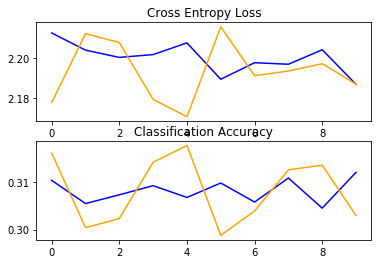

In [67]:
# GRAFICANDO resultados
import matplotlib.pyplot as plt
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['acc'], color='blue', label='train')
plt.plot(history.history['val_acc'], color='orange', label='test')

In [68]:
# EVALUANDO la Red
acc = model.evaluate_generator(testing_set, num_imgs_testing/batch_size)
print('\nValidación:')
print('val_loss %.3f' % (acc[0] * 100.0))
print('val_acc %.3f' % (acc[1] * 100.0))


Validación:
val_loss 219.730
val_acc 31.363


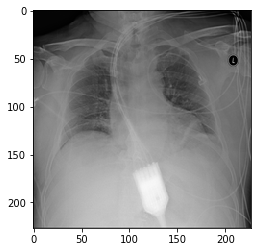

[[0.13230991 0.03433134 0.04045627 0.01982451 0.12323692 0.02543218
  0.02200675 0.00375511 0.320308   0.07147402 0.08928283 0.01054278
  0.069557   0.03748238]]
0.13230991


In [70]:
# Testing con una imagen
from keras.preprocessing import image
import matplotlib.pyplot as plt

test_image_path = 'Data_resize/Data_Enfermedades/test/Atelectasis/00000109_000.png'
test_image = image.load_img(test_image_path)
plt.imshow(test_image)
plt.show()

test_image = image.load_img(test_image_path,target_size = (img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)


result = model.predict(test_image)
# {'Atelectasis': 0, 'Cardiomegaly': 1, 'Consolidation': 2, 'Edema': 3, 'Effusion': 4, 'Emphysema': 5, 'Fibrosis': 6, 'Hernia': 7, 'Infiltration': 8, 'Mass': 9, 'Nodule': 10, 'Pleural_Pneumonia': 11, 'Pleural_Pneumothorax': 12, 'Pleural_Thickening': 13}
print(result)
print(result[0][0])